#### Referências:
* https://ieeexplore.ieee.org/document/11029450

<p>
@ARTICLE{11029450,
  author={Ribeiro, Jean A. and Carmo, Diedre S. Do and Reis, Fabiano and Magalhães, Ricardo S. and Dertkigil, Sergio S. J. and Appenzeller, Simone and Rittner, Leticia},
  journal={IEEE Data Descriptions}, 
  title={Descriptor: Manually Annotated CT Dataset of Lung Lobes in COVID-19 and Cancer Patients (LOCCA)}, 
  year={2025},
  volume={2},
  number={},
  pages={239-246},
  keywords={Lungs;Computed tomography;Annotations;Lung cancer;Biomedical imaging;Lesions;Image segmentation;Manuals;COVID-19;Three-dimensional displays;Cancer;computed tomography (CT) images;COVID-19;dataset;manual annotation for lung lobes},
  doi={10.1109/IEEEDATA.2025.3577999}}
</p>

In [1]:
from pathlib import Path
import shutil

# Lembrar de montar o HD
DATASETS_DIR = Path('/media/duque/devstore')
LOCCA_DIR = DATASETS_DIR / 'locca'

### Informações básicas

In [2]:
print(LOCCA_DIR)
for path in sorted(LOCCA_DIR.iterdir()):
    print('\t|__'+path.name)

/media/duque/devstore/locca
	|__README.md
	|__annotations_HCU
	|__annotations_Task06-Lung
	|__images_HCU_FULL
	|__images_TASK06_FULL
	|__original
	|__parts
	|__scripts


Necessário coletar o restante dos dados (que são os 30 volumes da Task06 do MSD):


https://drive.google.com/drive/folders/1HqEgzS8BV2c7xYNrZdEAnrHk7osJJ--2

Armazenei esses dados em 'LOCCA_DIR / original'

In [ ]:
# TASK06_DIR = LOCCA_DIR / 'images_TASK06_FULL'
# TASK06_DIR.mkdir(exist_ok=True)


# original_paths = [path for path in (LOCCA_DIR / 'original/Task06_Lung').glob('*/lung*.nii.gz')]
# annotation_paths = [
#     path.name.split('.')[0].replace('_label', '')
#     for path in (LOCCA_DIR / 'annotations_Task06-Lung').glob('lung*')
# ]


# # Filtragem
# for path in sorted(original_paths):
#     if path.name.split('.')[0] in annotation_paths and \
#         path.parent.name != 'labelsTr':
        
#         shutil.copy(path, TASK06_DIR/f'images_TASK06/{path.name}')

In [3]:
HCU_DIR = LOCCA_DIR / 'images_HCU_FULL/images_HCU'
TASK06_DIR = LOCCA_DIR / 'images_TASK06_FULL/images_TASK06'

print(f'{len(list(HCU_DIR.iterdir()))} volumes do conjunto do HCU')
print(f'{len(list(TASK06_DIR.iterdir()))} volumes do conjunto da Task 06 do MSD')

30 volumes do conjunto do HCU
30 volumes do conjunto da Task 06 do MSD


### Leitura e Visualização

In [4]:
import sys
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt

ROOT_DIR = Path.cwd().parent
sys.path.append(str(ROOT_DIR))

from src.utils.load_image_and_annotation import load_nifti, load_nrrd, visualize_slice  # noqa: E402, F401

In [5]:
volumes = sorted(LOCCA_DIR.glob('images*/*/*.nii.gz'), key=lambda p:p.name)
masks = sorted(LOCCA_DIR.glob('annotations*/*.nrrd'), key=lambda p:p.name)

In [49]:
sample_file = volumes[random.randint(0, 59)]
vol = load_nifti(sample_file)

print(f'vol type: {type(vol)}')
print(f'vol len: {len(vol)}')

vol


vol type: <class 'tuple'>
vol len: 2


(array([[[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],
 
        [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         ...,
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.]],
 
        [[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
      

Existem dois arrays do objeto de um volume. A slice em si é o primeiro array e há apenas um canal de intensidades de valores.

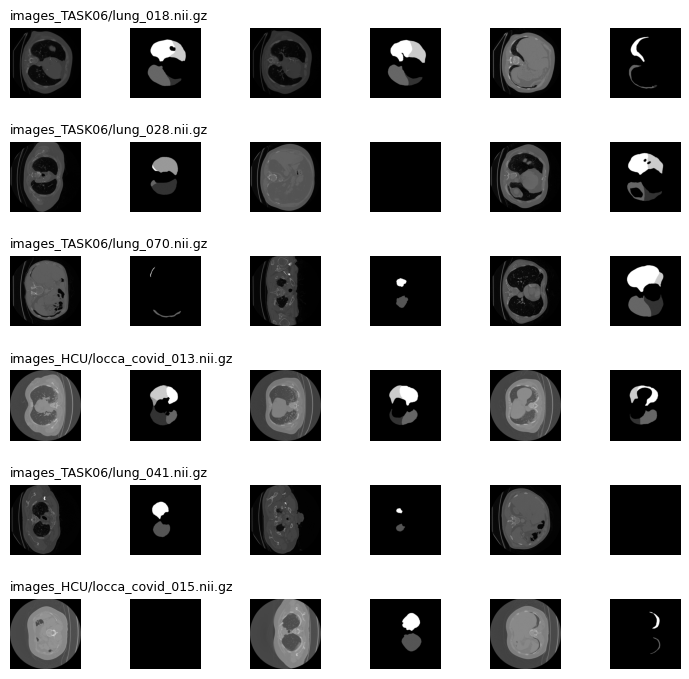

In [54]:
def visualize_batch(num_lins, volumes, masks):
    assert num_lins % 2 == 0
	
    fig, axs = plt.subplots(num_lins, num_lins, figsize=(7, 7))

    for i, lin in enumerate(axs):
        file_idx = random.randint(0, 59)
        volume_path, mask_path = volumes[file_idx], masks[file_idx]

        volume, _ = load_nifti(volume_path)
        mask, _ = load_nrrd(mask_path)

        assert volume.shape == mask.shape

        # slice - mask | slice - mask | ...
        # ...
        for j in range(0, num_lins, 2):
            # exibir slice
            slice_idx = random.randint(0, volume.shape[-1]-1)
            slice = volume[:, :, slice_idx]

            lin[j].imshow(slice, cmap='gray')
            lin[j].axis('off')

            # exibir anotações
            slice_mask = mask[:, :, slice_idx]
            lin[j+1].imshow(slice_mask, cmap='gray')
            lin[j+1].axis('off')
        
        lin[0].set_title(volume_path.parent.name+'/'+volume_path.name, fontsize=9, loc='left')

    # if mask is not None:
    # 	plt.subplot(1, 2, 2)
    # 	plt.imshow(image[:, :, slice_index], cmap='gray')
    # 	plt.imshow(mask[:, :, slice_index], cmap='jet', alpha=0.5)
    # 	plt.title('Segmentation Mask')
    plt.tight_layout()
    plt.show()

# title=sample_file.parent.name + '/' + sample_file.name
visualize_batch(6, volumes, masks)

É perceptível que a distribuição de intensidade é bastante variável, entre os dois conjuntos. Necessário uma espécie de equalização ou algum outro método de filtragem. Além disso, há a possibilidade de usar janelas de valores de Hounsfield Units.

Há determinadas máscaras onde os nódulos estão recortados. Filtrar pelos metadados as slices? Como lidar com máscaras com lacunas de lesões pulmonares?

Resposta: ...

In [15]:
def vols_generator(volumes, masks):
    for vol_path, mask_path in zip(volumes, masks):
        yield load_nifti(vol_path)[0], load_nrrd(mask_path)[0]

In [16]:
generator = vols_generator(volumes, masks)

In [17]:
shapes = []

for vol, mask in generator:
    print(vol.shape)
    shapes.append(vol.shape)

(512, 512, 394)
(512, 512, 438)
(512, 512, 456)
(512, 512, 436)
(512, 512, 961)
(512, 512, 317)
(512, 512, 396)
(512, 512, 311)
(512, 512, 441)
(512, 512, 398)
(512, 512, 503)
(512, 512, 373)
(512, 512, 403)
(512, 512, 1126)
(512, 512, 448)
(512, 512, 413)
(512, 512, 438)
(512, 512, 373)
(512, 512, 402)
(512, 512, 333)
(512, 512, 339)
(512, 512, 401)
(512, 512, 338)
(512, 512, 313)
(512, 512, 406)
(512, 512, 394)
(512, 512, 363)
(512, 512, 217)
(512, 512, 376)
(512, 512, 326)
(512, 512, 304)
(512, 512, 269)
(512, 512, 288)
(512, 512, 276)
(512, 512, 329)
(512, 512, 567)
(512, 512, 301)
(512, 512, 241)
(512, 512, 265)
(512, 512, 277)
(512, 512, 228)
(512, 512, 580)
(512, 512, 273)
(512, 512, 129)
(512, 512, 235)
(512, 512, 483)
(512, 512, 531)
(512, 512, 565)
(512, 512, 376)
(512, 512, 264)
(512, 512, 251)
(512, 512, 296)
(512, 512, 240)
(512, 512, 248)
(512, 512, 128)
(512, 512, 266)
(512, 512, 289)
(512, 512, 369)
(512, 512, 231)
(512, 512, 251)


In [50]:
shapes_np = np.array(shapes)

Text(0.5, 0.98, 'Analise do shape das 60 slices')

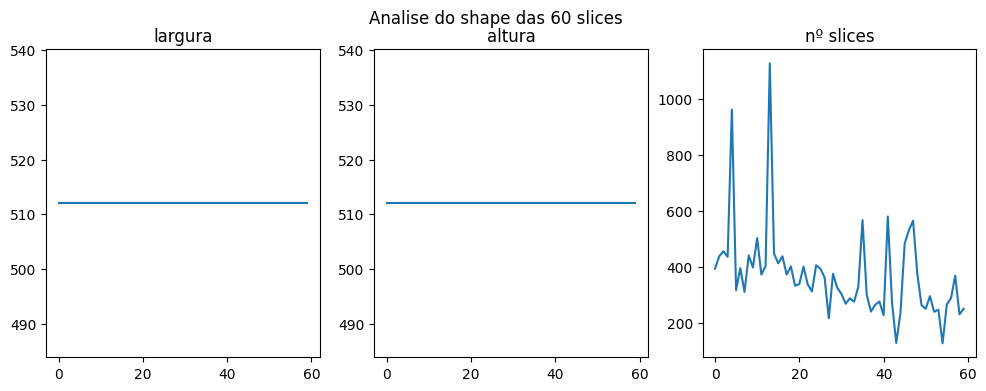

In [51]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(131); plt.plot(shapes_np[:, 0]); plt.title('largura')
plt.subplot(132); plt.plot(shapes_np[:, 1]); plt.title('altura')
plt.subplot(133); plt.plot(shapes_np[:, 2]); plt.title('nº slices')

plt.suptitle('Analise do shape das 60 slices')

In [66]:
print('Quantidade mínima de slices: ', shapes_np.min())
print('Quantidade máxima de slices: ', shapes_np.max())

print('Quantidade de slices: ', shapes_np.sum(axis=0)[-1])

Quantidade mínima de slices:  128
Quantidade máxima de slices:  1126
Quantidade de slices:  22183
